# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

**Importing Necessary Libraries:**

In [1]:
pip install wordcloud

In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anis7\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anis7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Web Scraping**

Using the BeautifulSoup Library, 1500 reviews from passengers travelling through British Airways are scraped from web pages.

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 15
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Check-in was slow with onl...
1,Not Verified | Check in was smooth enough. Bo...
2,✅ Trip Verified | Although transferring to thi...
3,✅ Trip Verified | We are extremely grateful ...
4,✅ Trip Verified | I had an appalling experie...


In [6]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
df = pd.read_csv("BA_reviews.csv")
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Check-in was slow with onl...
1,1,Not Verified | Check in was smooth enough. Bo...
2,2,✅ Trip Verified | Although transferring to thi...
3,3,✅ Trip Verified | We are extremely grateful ...
4,4,✅ Trip Verified | I had an appalling experie...


In [8]:
df.reviews = df.reviews.str.split('|', expand=True)[1]
df

,Unnamed: 0,reviews
0,0,Check-in was slow with only one staff membe...
1,1,Check in was smooth enough. Boarding was cha...
2,2,Although transferring to this flight through ...
3,3,We are extremely grateful to the crew of fl...
4,4,I had an appalling experience with British ...
...,...,...
1495,1495,London to Muscat first class. First time try...
1496,1496,My family and I travelled from Cape Town to ...
1497,1497,Gatwick to Madeira. The flight left on time ...
1498,1498,London to Casablanca. Their customer service ...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1500 non-null   int64 
 1   reviews     1500 non-null   object
dtypes: int64(1), object(1)
memory usage: 23.6+ KB


In [10]:
df.describe()

,Unnamed: 0
count,1500.000000
mean,749.500000
std,433.157015
min,0.000000
25%,374.750000
50%,749.500000
75%,1124.250000
max,1499.000000


In [11]:
df.shape

(1500, 2)

In [12]:
df.isnull().any()

Unnamed: 0    False
reviews       False
dtype: bool

**Pre-Processing the Dataset**

In [13]:
df['reviews'] = df['reviews'].str.lower()
df

,Unnamed: 0,reviews
0,0,check-in was slow with only one staff membe...
1,1,check in was smooth enough. boarding was cha...
2,2,although transferring to this flight through ...
3,3,we are extremely grateful to the crew of fl...
4,4,i had an appalling experience with british ...
...,...,...
1495,1495,london to muscat first class. first time try...
1496,1496,my family and i travelled from cape town to ...
1497,1497,gatwick to madeira. the flight left on time ...
1498,1498,london to casablanca. their customer service ...


In [14]:
df['tokens'] = df['reviews'].apply(word_tokenize)
df

,Unnamed: 0,reviews,tokens
0,0,check-in was slow with only one staff membe...,"[check-in, was, slow, with, only, one, staff, ..."
1,1,check in was smooth enough. boarding was cha...,"[check, in, was, smooth, enough, ., boarding, ..."
2,2,although transferring to this flight through ...,"[although, transferring, to, this, flight, thr..."
3,3,we are extremely grateful to the crew of fl...,"[we, are, extremely, grateful, to, the, crew, ..."
4,4,i had an appalling experience with british ...,"[i, had, an, appalling, experience, with, brit..."
...,...,...,...
1495,1495,london to muscat first class. first time try...,"[london, to, muscat, first, class, ., first, t..."
1496,1496,my family and i travelled from cape town to ...,"[my, family, and, i, travelled, from, cape, to..."
1497,1497,gatwick to madeira. the flight left on time ...,"[gatwick, to, madeira, ., the, flight, left, o..."
1498,1498,london to casablanca. their customer service ...,"[london, to, casablanca, ., their, customer, s..."


In [15]:
#Removing unnecessary words that may hinder the sentient analysis
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['reviews'] = df['reviews'].apply(lambda text: cleaning_stopwords(text))
df['reviews'].head()

0    check-in slow one staff member checking econom...
1    check smooth enough. boarding chaotic. herded ...
2    although transferring flight heathrow budapest...
3    extremely grateful crew flight ba0058 cape tow...
4    appalling experience british airways. started ...
Name: reviews, dtype: object

In [16]:
#Removing Punctuations
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['reviews']= df['reviews'].apply(lambda x: cleaning_punctuations(x))
df['reviews'].head()

0    checkin slow one staff member checking economy...
1    check smooth enough boarding chaotic herded ga...
2    although transferring flight heathrow budapest...
3    extremely grateful crew flight ba0058 cape tow...
4    appalling experience british airways started t...
Name: reviews, dtype: object

In [17]:
#Converting the cleaned reviews into tokens
df['tokens'] = df['reviews'].apply(word_tokenize)
df

,Unnamed: 0,reviews,tokens
0,0,checkin slow one staff member checking economy...,"[checkin, slow, one, staff, member, checking, ..."
1,1,check smooth enough boarding chaotic herded ga...,"[check, smooth, enough, boarding, chaotic, her..."
2,2,although transferring flight heathrow budapest...,"[although, transferring, flight, heathrow, bud..."
3,3,extremely grateful crew flight ba0058 cape tow...,"[extremely, grateful, crew, flight, ba0058, ca..."
4,4,appalling experience british airways started t...,"[appalling, experience, british, airways, star..."
...,...,...,...
1495,1495,london muscat first class first time trying fi...,"[london, muscat, first, class, first, time, tr..."
1496,1496,family travelled cape town london 10th march 2...,"[family, travelled, cape, town, london, 10th, ..."
1497,1497,gatwick madeira flight left time arrived early...,"[gatwick, madeira, flight, left, time, arrived..."
1498,1498,london casablanca customer service quality hea...,"[london, casablanca, customer, service, qualit..."


**Performing Sentient Analysis**

Through TextBlob Library, the tokens are segregated into positive, negative and neutral words.

In [18]:
df['Polarity'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
def senti(score):
    if score>0:
        return 'Positive'
    elif score<0:
        return 'Negative'
    else:
        return 'Neutral'
df['Feedback']=df['Polarity'].apply(senti)

In [19]:
df.head()

,Unnamed: 0,reviews,tokens,Polarity,Feedback
0,0,checkin slow one staff member checking economy...,"[checkin, slow, one, staff, member, checking, ...",-0.067347,Negative
1,1,check smooth enough boarding chaotic herded ga...,"[check, smooth, enough, boarding, chaotic, her...",0.054167,Positive
2,2,although transferring flight heathrow budapest...,"[although, transferring, flight, heathrow, bud...",0.330556,Positive
3,3,extremely grateful crew flight ba0058 cape tow...,"[extremely, grateful, crew, flight, ba0058, ca...",0.078333,Positive
4,4,appalling experience british airways started t...,"[appalling, experience, british, airways, star...",-0.058171,Negative


In [20]:
df['Num_Feedback'] = df['Feedback'].replace({'Positive': 0, 'Negative':1, 'Neutral':2})
df

,Unnamed: 0,reviews,tokens,Polarity,Feedback,Num_Feedback
0,0,checkin slow one staff member checking economy...,"[checkin, slow, one, staff, member, checking, ...",-0.067347,Negative,1
1,1,check smooth enough boarding chaotic herded ga...,"[check, smooth, enough, boarding, chaotic, her...",0.054167,Positive,0
2,2,although transferring flight heathrow budapest...,"[although, transferring, flight, heathrow, bud...",0.330556,Positive,0
3,3,extremely grateful crew flight ba0058 cape tow...,"[extremely, grateful, crew, flight, ba0058, ca...",0.078333,Positive,0
4,4,appalling experience british airways started t...,"[appalling, experience, british, airways, star...",-0.058171,Negative,1
...,...,...,...,...,...,...
1495,1495,london muscat first class first time trying fi...,"[london, muscat, first, class, first, time, tr...",0.194198,Positive,0
1496,1496,family travelled cape town london 10th march 2...,"[family, travelled, cape, town, london, 10th, ...",0.027778,Positive,0
1497,1497,gatwick madeira flight left time arrived early...,"[gatwick, madeira, flight, left, time, arrived...",0.132692,Positive,0
1498,1498,london casablanca customer service quality hea...,"[london, casablanca, customer, service, qualit...",-0.012619,Negative,1


In [21]:
#Separating the reviews into positive, negative and neutral dataframes
df_positive = df[df['Feedback'] == 'Positive']
df_negative = df[df['Feedback'] == 'Negative']
df_neutral=df[df['Feedback'] == 'Neutral']

In [22]:
df_positive.head()

,Unnamed: 0,reviews,tokens,Polarity,Feedback,Num_Feedback
1,1,check smooth enough boarding chaotic herded ga...,"[check, smooth, enough, boarding, chaotic, her...",0.054167,Positive,0
2,2,although transferring flight heathrow budapest...,"[although, transferring, flight, heathrow, bud...",0.330556,Positive,0
3,3,extremely grateful crew flight ba0058 cape tow...,"[extremely, grateful, crew, flight, ba0058, ca...",0.078333,Positive,0
5,5,good points cabin crew helpful professional ma...,"[good, points, cabin, crew, helpful, professio...",0.047050,Positive,0
6,6,decent flight reasonable comfortable seat pilo...,"[decent, flight, reasonable, comfortable, seat...",0.245022,Positive,0


***Exploratory Data Analysis***

In [23]:
pos_w = ''.join(df_positive['reviews'].astype(str).tolist())

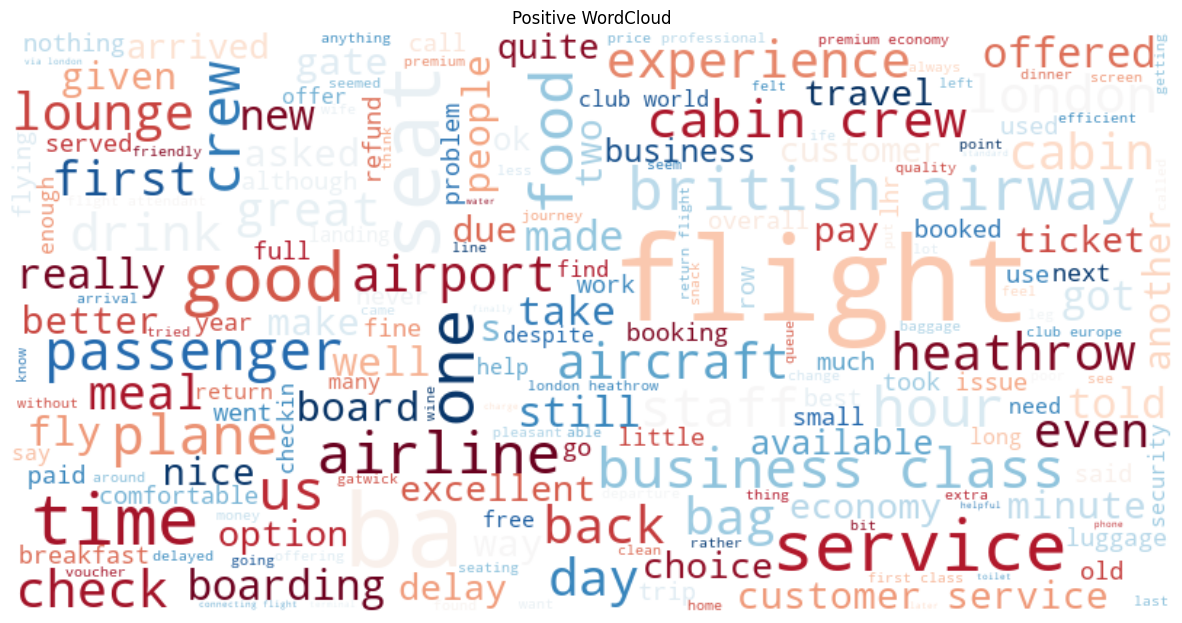

In [24]:
words = WordCloud(width = 800, height = 400, random_state = 50, max_font_size = 80, background_color='white', colormap = 'RdBu').generate(pos_w)
plt.figure(figsize=(15,8))
plt.imshow(words, interpolation='bilinear')
plt.axis('off')
plt.title("Positive WordCloud")
plt.show()

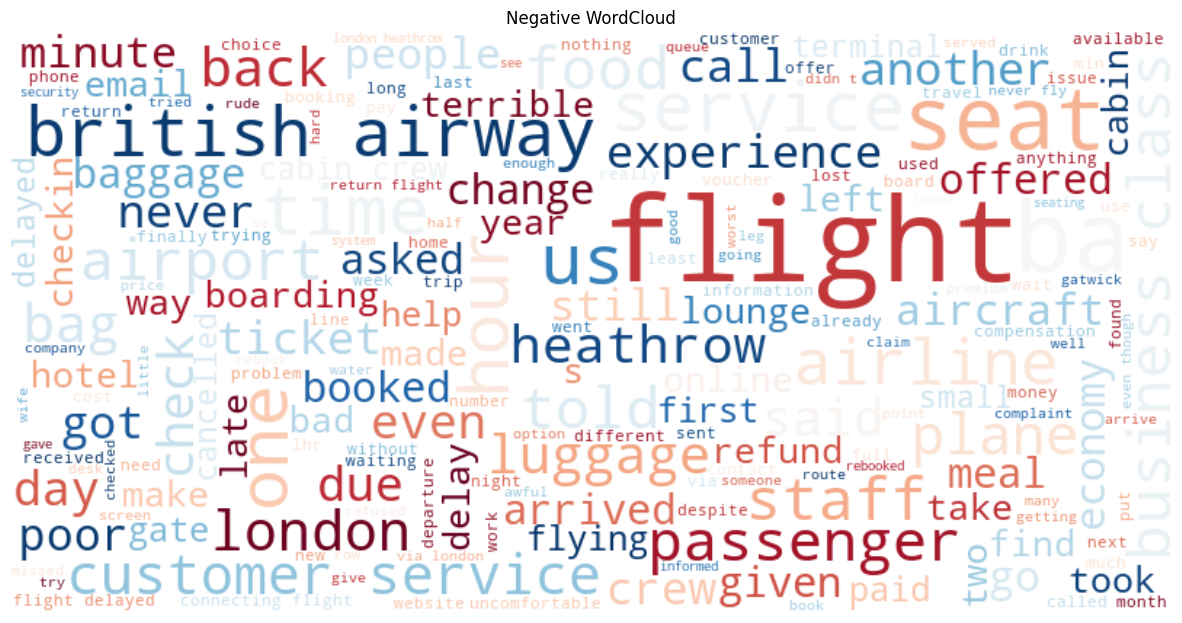

In [25]:
neg_w = ''.join(df_negative['reviews'].astype(str).tolist())
negative_w = WordCloud(width = 800, height = 400, random_state = 32, max_font_size = 80, background_color='white', colormap = 'RdBu').generate(neg_w)
plt.figure(figsize=(15,8))
plt.imshow(negative_w, interpolation='bilinear')
plt.axis('off')
plt.title("Negative WordCloud")
plt.show()

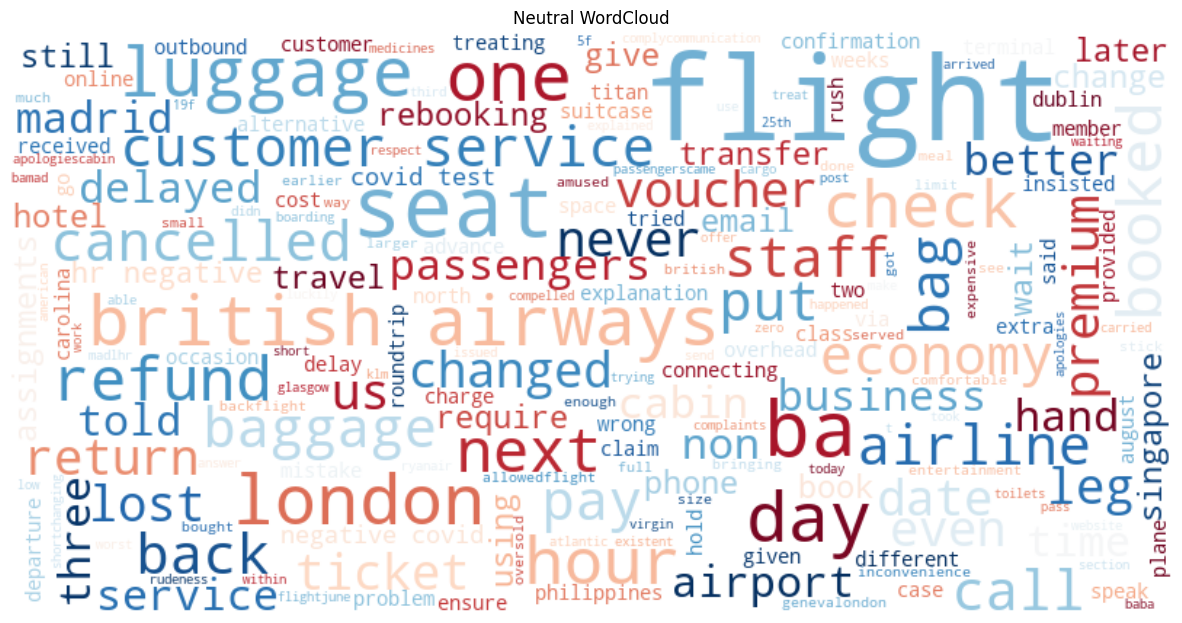

In [26]:
neu_w = ''.join(df_neutral['reviews'].astype(str).tolist())
neutral_w = WordCloud(width = 800, height = 400, random_state = 42, max_font_size = 80, background_color='white', colormap = 'RdBu').generate(neu_w)
plt.figure(figsize=(15,8))
plt.imshow(neutral_w, interpolation='bilinear')
plt.axis('off')
plt.title("Neutral WordCloud")
plt.show()

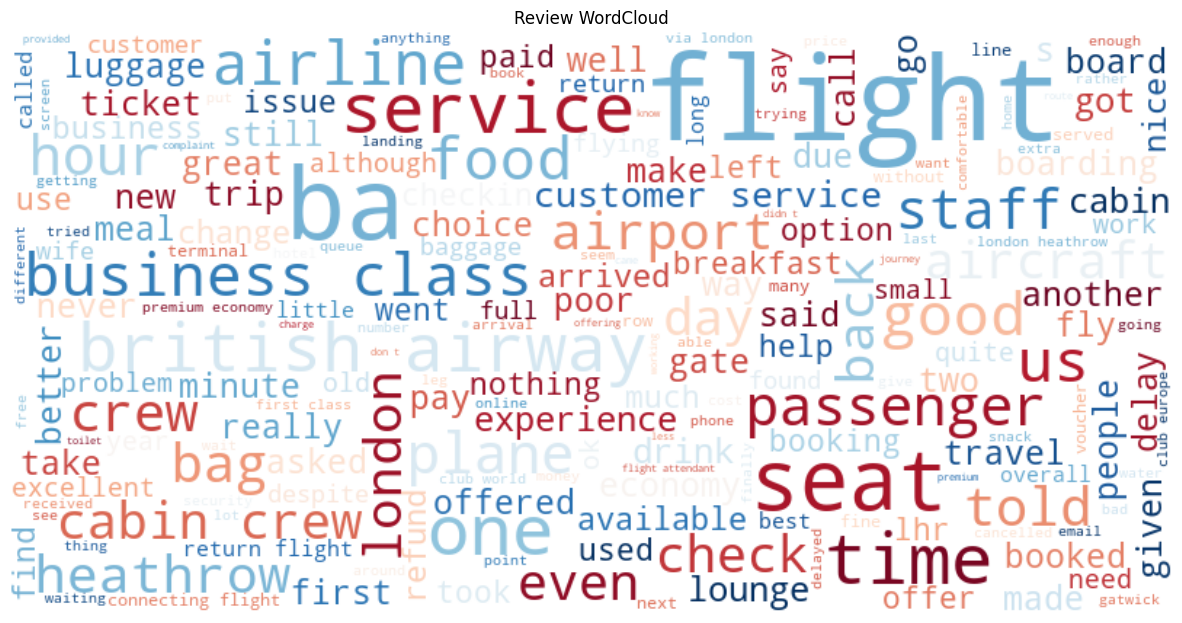

In [27]:
all_words = ''.join(df['reviews'].astype(str).tolist())
all_w = WordCloud(width = 800, height = 400, random_state = 42, max_font_size = 80, background_color='white', colormap = 'RdBu').generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(all_w, interpolation='bilinear')
plt.axis('off')
plt.title("Review WordCloud")
plt.show()

In [28]:
feed_count = df['Feedback'].value_counts()
feed_count

Feedback
Positive    956
Negative    523
Neutral      21
Name: count, dtype: int64

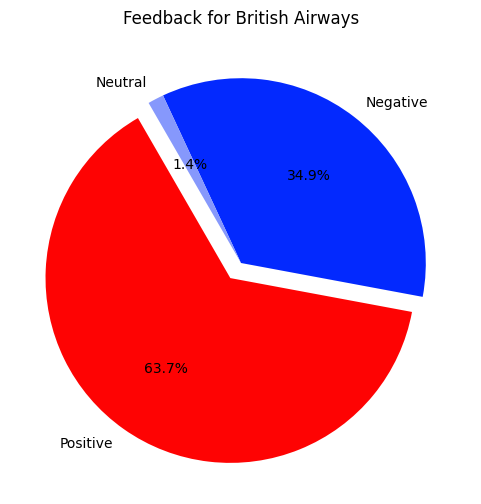

In [29]:
plt.figure(figsize=(6, 6))
palette = ['#fe0303','#0329fe','#8698fc']
explode = (0.1,0,0)
plt.pie(feed_count ,labels=feed_count.index, explode = explode, autopct='%1.1f%%', colors= palette, startangle=120)
plt.title("Feedback for British Airways")
plt.show()

<Axes: title={'center': 'Bar Chart Representation'}, xlabel='Feedback', ylabel='count'>

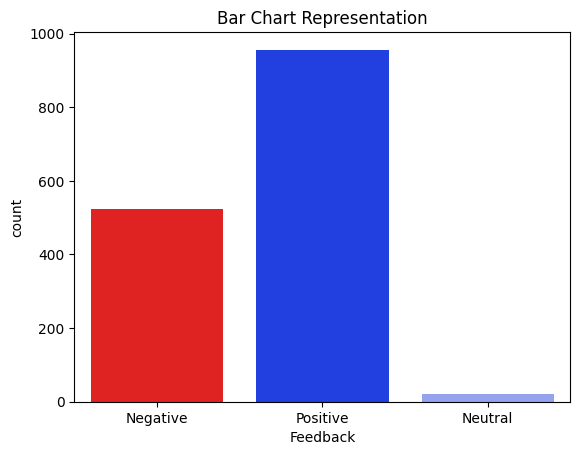

In [30]:
plt.title("Bar Chart Representation")
sns.countplot(df, x="Feedback", palette= palette)

**Conclusion**

1. A total of 1500 reviews were scraped using the BeautifulSoup Library.
2. To perform sentient analysis, the dataset is cleaned, pre-processed and tokenized.
3. On segregation of revi